<a href="https://colab.research.google.com/github/AanchalDogra/Prob_Stats/blob/main/Adv_Distributions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns
from  scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/911.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


In [5]:
df = df[['timeStamp']]

In [6]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [7]:
df

,timeStamp
0,2015-12-10 17:10:52
1,2015-12-10 17:29:21
2,2015-12-10 14:39:21
3,2015-12-10 16:47:36
4,2015-12-10 16:56:52
...,...
663517,2020-07-29 15:46:51
663518,2020-07-29 15:52:19
663519,2020-07-29 15:52:52
663520,2020-07-29 15:54:08


In [8]:
def d_m_y(x):
  return f"{x.day}-{x.month}-{x.year}"

def hour(x):
  return x.hour

In [9]:
df['d-m-y'] = df['timeStamp'].apply(d_m_y)
df['hour'] = df['timeStamp'].apply(hour)

In [10]:
calls = df.groupby(['d-m-y','hour'],as_index = False).count()

In [11]:
calls.rename(columns = {'timeStamp':'calls'}, inplace = True)

In [12]:
calls

,d-m-y,hour,calls
0,1-1-2016,0,19
1,1-1-2016,1,11
2,1-1-2016,2,13
3,1-1-2016,3,6
4,1-1-2016,4,3
...,...,...,...
40541,9-9-2019,19,14
40542,9-9-2019,20,14
40543,9-9-2019,21,22
40544,9-9-2019,22,5


In [13]:
CALLS = pd.pivot_table(data = calls, values = 'calls', index = 'd-m-y', columns = 'hour')

In [14]:
CALLS

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
d-m-y,,,,,,,,,,,,,,,,,,,,,
1-1-2016,19.0,11.0,13.0,6.0,3.0,4.0,5.0,8.0,9.0,7.0,...,15.0,11.0,8.0,20.0,13.0,15.0,10.0,9.0,10.0,11.0
1-1-2017,14.0,13.0,19.0,11.0,14.0,13.0,12.0,7.0,8.0,13.0,...,17.0,17.0,15.0,11.0,15.0,12.0,12.0,10.0,5.0,7.0
1-1-2018,18.0,13.0,21.0,14.0,13.0,8.0,6.0,10.0,17.0,11.0,...,42.0,21.0,20.0,17.0,22.0,16.0,18.0,15.0,13.0,4.0
1-1-2019,17.0,11.0,12.0,10.0,6.0,6.0,10.0,8.0,10.0,10.0,...,23.0,17.0,23.0,4.0,14.0,15.0,13.0,8.0,10.0,5.0
1-1-2020,21.0,13.0,5.0,7.0,3.0,11.0,6.0,6.0,11.0,16.0,...,18.0,17.0,15.0,22.0,15.0,19.0,13.0,17.0,10.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9-8-2019,8.0,7.0,10.0,2.0,6.0,4.0,8.0,23.0,19.0,13.0,...,31.0,31.0,24.0,34.0,29.0,26.0,22.0,23.0,13.0,8.0
9-9-2016,7.0,10.0,4.0,4.0,5.0,4.0,7.0,27.0,32.0,34.0,...,21.0,32.0,28.0,26.0,17.0,24.0,19.0,23.0,19.0,13.0
9-9-2017,4.0,8.0,6.0,2.0,6.0,8.0,7.0,15.0,18.0,11.0,...,20.0,12.0,19.0,19.0,14.0,12.0,17.0,17.0,15.0,8.0


In [15]:
type(CALLS)

pandas.core.frame.DataFrame

Text(0, 0.5, 'Number of calls')

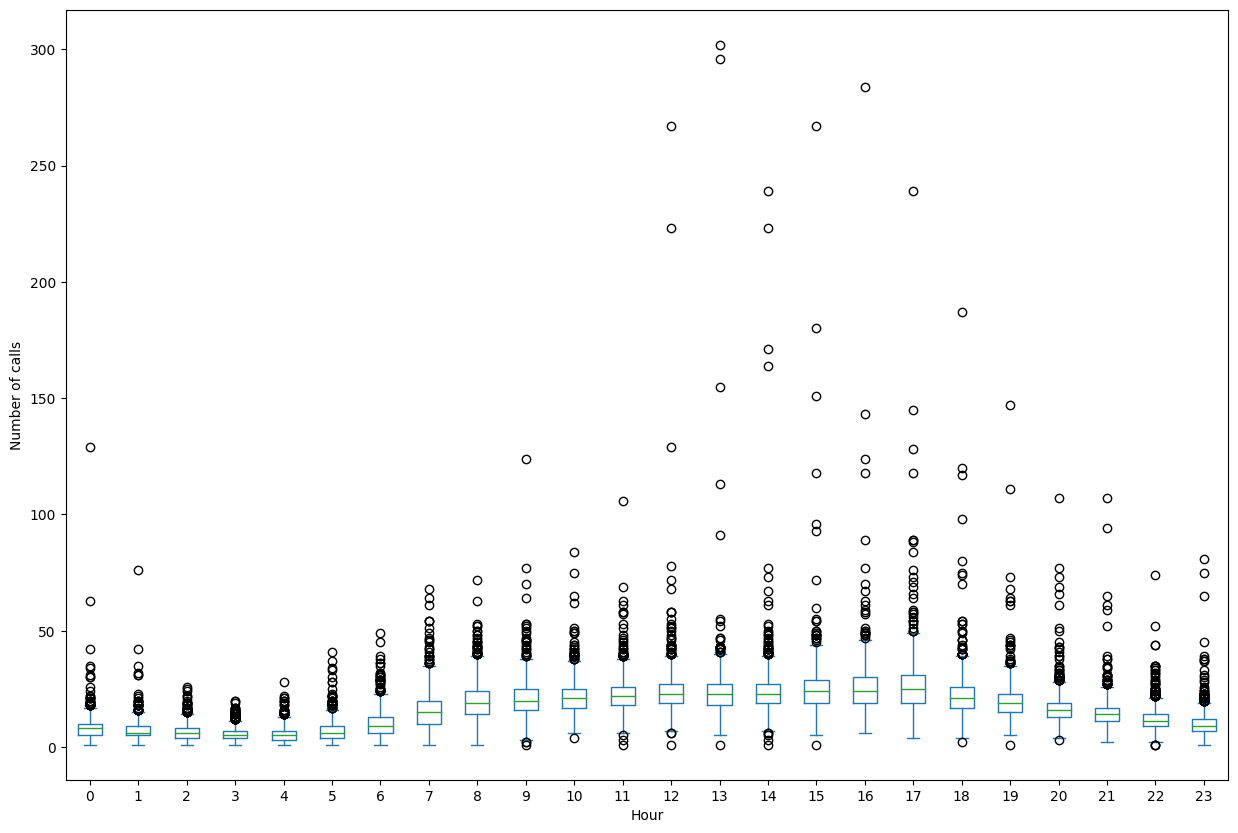

In [18]:
CALLS.plot.box(figsize = (15,10))
plt.xlabel('Hour')
plt.ylabel('Number of calls')

In [23]:
median_calls_per_hour = CALLS.median().reset_index().rename(columns = {0:'number of calls'})

In [24]:
median_calls_per_hour

,hour,number of calls
0,0,8.0
1,1,6.0
2,2,6.0
3,3,5.0
4,4,5.0
5,5,6.0
6,6,9.0
7,7,15.0
8,8,19.0
9,9,20.0


<Axes: xlabel='hour', ylabel='number of calls'>

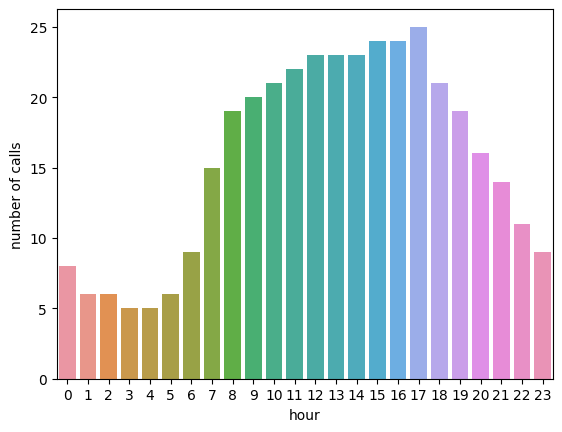

In [25]:
sns.barplot(x = 'hour', y = 'number of calls', data = median_calls_per_hour)

In [26]:
CALLS.isna().sum()

hour
0      7
1      8
2     17
3     14
4     11
5     11
6      2
7      4
8      1
9      2
10     2
11     3
12     2
13     4
14     1
15     1
16     2
17     2
18     2
19     3
20     2
21     2
22     3
23     4
dtype: int64

In [27]:
CALLS.fillna(0,inplace = True)

In [28]:
# # prompt: write marhematical euation of poisson distribution

# def poisson(x, lam):
#   return (lam**x * np.exp(-lam))/stats.factorial(x)


# prompt: write equation of poisson disbn not in code but in markcode using latex

$$P(X = x) = \frac{\lambda^x e^{-\lambda}}{x!}$$

In [30]:
poisson_distribution_hour_wise = {}

In [36]:
for row in median_calls_per_hour.iterrows():
  print(int(row[1]['hour']))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23


In [37]:
import pandas as pd

# Creating a simple DataFrame
data = {'Name': ['Alice', 'Bob', 'Charlie'],
        'Age': [25, 30, 35],
        'City': ['New York', 'San Francisco', 'Los Angeles']}

df = pd.DataFrame(data)

# Using iterrows to iterate over rows
for index, row in df.iterrows():
    print(f"Index: {index}, Name: {row['Name']}, Age: {row['Age']}, City: {row['City']}")


Index: 0, Name: Alice, Age: 25, City: New York
Index: 1, Name: Bob, Age: 30, City: San Francisco
Index: 2, Name: Charlie, Age: 35, City: Los Angeles
